Optimization terminated successfully.
         Current function value: 164.379479
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
{'alpha': array(1.013664091407883), 'beta': array([ 1.46791597,  0.29358319]), 'sigma_log_': array(0.11928769449979058)}
Optimization terminated successfully.
         Current function value: 164.380110
         Iterations: 6
         Function evaluations: 271
Optimization terminated successfully.
         Current function value: 164.380110
         Iterations: 6
         Function evaluations: 271


100%|██████████| 2000/2000 [00:14<00:00, 139.57it/s]



alpha:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.025            0.240            0.007            [0.571, 1.490]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.578          0.858          1.027          1.189          1.508


beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.558            1.925            0.110            [-2.006, 5.693]
  -0.278           9.360            0.541            [-16.967, 19.384]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -2.398         0.289          1.623          2.839          5.359
  -18.240        -6.482         -0.4

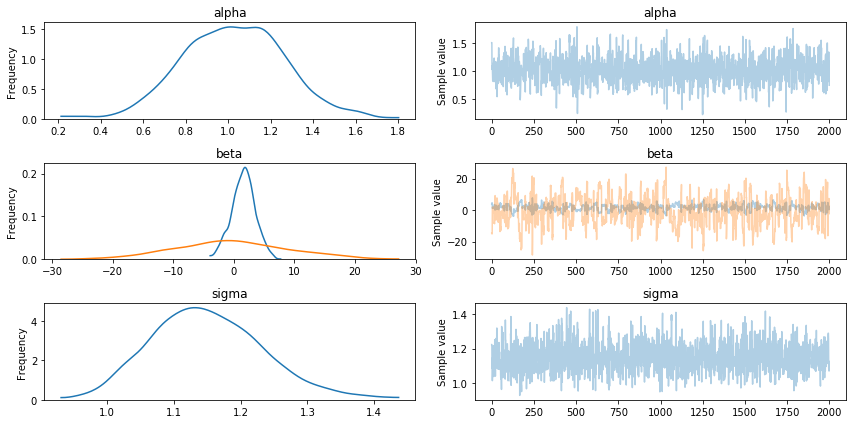

In [6]:
# LINEAR REGRESSION

import numpy as np
import matplotlib.pyplot as plt

# Initialize RNG
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of the dataset
size = 100

# Predictor variables: they are given values with numpy.linspace
X1 = np.linspace(0, 1, size)
X2 = np.linspace(0, .2, size)

# Simulate outcome variable (simulating random normally distributed noise from the prediction)
Y = alpha + beta[0] * X1 + beta[1] * X2 + np.random.randn(size) * sigma

# Model implementation in PyMC3
from pymc3 import Model, Normal, HalfNormal

# Model object: container for the model random variables
basic_model = Model()

# Context manager: PyMC3 objects are added to the model
with basic_model:

    # Stochastic random variables for the unknown model parameters: with Normal prior distributions for the regression
    # coefficients and half-normal prior distribution for the sd of the observations
    alpha = Normal('alpha', mu = 0, sd = 10)
    beta = Normal('beta', mu = 0, sd = 10, shape = 2)
    sigma = HalfNormal('sigma', sd = 1)

    # Deterministic random variable: expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2
    
    # Observed stochastic variable: data LH of the model or sampling distribution of observations
    Y_obs = Normal('Y_obs', mu = mu, sd = sigma, observed = Y)


# Obtaining posterior estimates for the unknown variables in the model: MAP and MCMC

# MAP: mode of the posterior distribution (one point):
# Use of BFGS optimization algorithm
from pymc3 import find_MAP

map_estimate = find_MAP(model = basic_model)

print(map_estimate)

# Use of Powell optimization algorithm
from scipy import optimize

map_estimate = find_MAP(model = basic_model, fmin = optimize.fmin_powell)




# MCMC: gradient-based sampling methods (NUTS)
from pymc3 import NUTS, sample

with basic_model:

    # Obtain starting values via MAP
    start = find_MAP(fmin = optimize.fmin_powell)

    # Instantiate sampler
    step = NUTS(scaling = start)

    # Draw 2000 posterior samples
    trace = sample(2000, step, start = start)

# Posterior analysis of the sampling output

# Simple posterior plot
from pymc3 import traceplot, summary

traceplot(trace)
summary(trace)

plt.show()





























